# **CineSentient: Integrated Sentiment-Enhanced Movie Discovery Engine**

**TEAM MEMBERS:**

1) Fayaz Moqueem Mohammed, fayaz@bu.edu

2) Gowtham Senthilnayaki, gs@bu.edu

3) Sonu Kumar, sonuk@bu.edu

YOU CAN VIEW THE CODE AND DATA USING THE DRIVE LINK [DRIVE](https://drive.google.com/drive/folders/1PE0JluLKGASyk64pxz9axqHaUrwJOjmk?usp=sharing)

# Introduction to CineSentient: Integrated Sentiment-Enhanced Movie Discovery Engine

## Project Overview
This project aims to harness the power of Natural Language Processing (NLP) and Machine Learning (ML) to analyze movie reviews for sentiment and subsequently use this analysis to power a sophisticated movie recommendation system.

## Project Roadmap

### 1. Data Collection
- **Scraping Movie Reviews**: Utilizing IMDbPY for scraping reviews and titles from IMDb.
- **Gathering Metadata**: Collecting additional movie metadata through the OMDb API.
- **Larger Dataset**: Incorporating a pre-existing large dataset of movie reviews for robust model training.

### 2. Sentiment Analysis with Transformers
- **Model Training**: Training various transformer models (like BERT, RoBERTa, DeBERTa) on the large dataset to understand the context and nuances in movie reviews.
- **Model Selection**: Evaluating and selecting the best-performing model based on training metrics.
- **Transfer Learning**: Applying the selected model via transfer learning to the scraped movie reviews dataset.
- **Sentiment Prediction**: Predicting sentiments (positive/negative) for each review in the new dataset.

### 3. Movie Recommendation System
- **Two-fold Approach**: Developing a recommendation system with two distinct methodologies.
  - **Content-Based Filtering**: Utilizing cosine similarity and user preferences (genres, actors, ratings) to suggest movies.
  - **NLP-Driven Recommendations**: Leveraging natural language queries and attributes extracted from movie plots and reviews for personalized recommendations.

### 4. Integration and Application
- **Sentiment Score Integration**: Incorporating the sentiment scores into the recommendation logic to enhance the recommendation quality.
- **User-Centric Recommendations**: Tailoring movie suggestions based on user inputs and sentiments associated with movies.

### 5. Conclusion
- **Utility and Impact**: The project demonstrates the effective use of NLP in understanding sentiments and the application of ML for personalized content recommendations.
- **Future Scope**: Exploring deeper integrations, such as user feedback loops, for continuous improvement of the recommendation system.

This project is a comprehensive endeavor to bridge sentiment analysis and movie recommendations, showcasing the potential of AI in the realm of personalized content curation.

## Data Scraping for Sentiment Analysis

### Overview
The project involves collecting a diverse range of movie reviews to perform sentiment analysis. This data collection is crucial for creating a robust dataset that captures a wide array of sentiments expressed across different movie genres.

### Data Scraping Process
1. **IMDbPY Library**: We use the IMDbPY library, a Python package to access the IMDb's database, for scraping movie reviews.
2. **Fetching Reviews**: For each movie ID, we retrieve the movie's title and its associated reviews. This is done using the `get_movie_reviews` function, which accesses the IMDb database and collects the content of each review.
3. **Creating DataFrames**: The scraped data is structured into a pandas DataFrame, with columns for movie titles and reviews. This DataFrame (`movie_reviews.csv`) serves as the primary dataset for our sentiment analysis.
4. **Metadata Collection**: Additionally, we gather movie metadata using the OMDb API. This metadata includes information such as the movie's release year, genre, director, actors, etc., and is stored in `movie_metadata.csv`.

### Role in Sentiment Analysis and Transfer Learning
- **Sentiment Analysis**: The collected reviews are used to perform sentiment analysis. By analyzing the text, we can classify each review as expressing a positive or negative sentiment.
- **Transfer Learning**: We employ transfer learning techniques using models like BERT, RoBERTa, or DeBERTa. These models, pre-trained on extensive language data, are further fine-tuned on our scraped movie reviews dataset, enabling them to accurately capture the sentiment nuances in movie reviews.
- **Predicting Sentiment**: The fine-tuned model is then used to predict the sentiment of each movie review in our dataset. This prediction adds a new dimension to our data, enriching it with sentiment insights.
- **Application**: The sentiment-enriched dataset can be used for various applications, such as recommending movies based on sentiment alignment, analyzing sentiment trends in movies over the years, or enhancing content-based filtering systems.

In summary, the data scraping process is a foundational step in our project, providing the essential data required for effective sentiment analysis and enabling the application of advanced NLP techniques through transfer learning.


In [ ]:
!pip install IMDbPY

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from imdb import IMDb

# an instance of the IMDb class
ia = IMDb()

# Function to fetch movie reviews and title
def get_movie_reviews(movie_id):
    movie = ia.get_movie(movie_id)
    title = movie.get('title')
    try:
        reviews = ia.get_movie_reviews(movie_id)
        review_list = reviews['data']['reviews']
        return [(title, review['content']) for review in review_list]
    except:
        return []

# List of movie IDs for different genres
movie_ids = ['0107362', '21191806', '1448754', '0094612', '0086719', '0206467', '6495770', '15600222', '0120633', '0078732', '0318155', '7656570', '12703292', '0087727', '1396208', '1305826', '15248880', '2359704', '0069113', '0096928', '0406375', '11165358', '0089791', '0367623', '5452780', '0058105', '4902964', '0087225', '1430626', '2112210', '0085794', '2176287', '17516478', '15561558', '0056943', '0304678', '0178131', '0497480', '2703720', '2112293', '29686471', '21227864', '1754811', '0236388', '0222850', '12759778', '22459586', '0247082', '2788432', '12677870', '0090410', '0802948', '20330434', '29692772', '15489004', '6190050', '5675620', '9398466', '0139668', '14549466', '10308500', '1173427', '1365451', '29116817', '0361467', '8426964', '7825580', '0808237', '3901006', '13925464', '28628302', '28013708', '3562532', '11341924', '9014894', '1844624', '12306692', '0073629', '3688406', '0051554', '0384806', '0448190', '0068713', '0078767', '13964404', '9174630', '0065669', '10905902', '0057155', '8199834', '5645370', '13186306', '0810614', '0390463', '0842682', '0901512', '24018570', '0117566', '4796190', '15462180', '1358355', '12569572', '0426811', '4854858', '8429824', '22482764', '0164295', '0053546', '0072285', '7671414', '0088263', '12735890', '27489557', '2051999', '0969784', '1144811', '2947716', '0242682', '4762138', '0080019']  # Add more IDs

# Fetch reviews for each movie and store in a list
all_reviews = []
for movie_id in movie_ids:
    all_reviews.extend(get_movie_reviews(movie_id))

# DataFrame and save to CSV
df = pd.DataFrame(all_reviews, columns=['Title', 'Review'])
df.to_csv('movie_reviews.csv', index=False)

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/CS505_PROJECT/DATA/movie_reviews.csv')
df2.shape

(1841, 2)

In [ ]:
df2.head()

,Title,Review
0,Last Action Hero,It's sad to think that 18 years after its rele...
1,Last Action Hero,"Another underrated movie, and one which few pe..."
2,Last Action Hero,We all have that one movie we absolutely love ...
3,Last Action Hero,"After Terminator 2: Judgement Day, the monolit..."
4,Last Action Hero,Highly underrated Arnie movie. Is it a comedy?...


In [ ]:
import pandas as pd

# Reading the reviews CSV to get the list of titles
reviews_df = pd.read_csv('/content/drive/MyDrive/CS505_PROJECT/DATA/movie_reviews.csv')
movie_titles = reviews_df['Title'].unique()


In [ ]:
import requests

def get_movie_metadata(title, api_key):
    params = {'t': title, 'apikey': api_key}
    response = requests.get("http://www.omdbapi.com/", params=params)
    return response.json()

# Our OMDb API key
api_key = '66ae734f'

# List to store metadata
movies_metadata = []

# Metadata for each movie title
for title in movie_titles:
    metadata = get_movie_metadata(title, api_key)
    movies_metadata.append(metadata)

# Converting the list of metadata to a DataFrame
metadata_df = pd.DataFrame(movies_metadata)

# Saving the df to a CSV file
metadata_df.to_csv('movie_metadata.csv', index=False)


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/CS505_PROJECT/DATA/movie_metadata.csv')
df3.head()


,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons
0,Last Action Hero,1993,PG-13,18 Jun 1993,130 min,"Action, Adventure, Comedy",John McTiernan,"Zak Penn, Adam Leff, Shane Black","Arnold Schwarzenegger, F. Murray Abraham, Art ...","With the help of a magic ticket, a young movie...",...,6.5,"160,858",tt0107362,movie,16 Apr 2012,"$50,016,394",NaN,NaN,True,NaN
1,Thanksgiving,2023,R,17 Nov 2023,106 min,"Horror, Mystery, Thriller",Eli Roth,"Jeff Rendell, Eli Roth","Patrick Dempsey, Ty Olsson, Gina Gershon","After a Black Friday riot ends in tragedy, a m...",...,6.9,"13,611",tt1448754,movie,NaN,"$31,429,920",NaN,NaN,True,NaN
2,Action Jackson,1988,R,12 Feb 1988,96 min,"Action, Comedy, Crime",Craig R. Baxley,Robert Reneau,"Carl Weathers, Craig T. Nelson, Vanity",Vengeance drives a tough Detroit cop to stay o...,...,5.5,"12,017",tt0094612,movie,01 May 2008,"$20,256,975",NaN,NaN,True,NaN
3,G.I. Joe,1985–1986,TV-Y7,16 Sep 1985,1 min,"Animation, Action, Adventure",NaN,NaN,"Jackson Beck, Christopher Collins, Michael Bell",An elite special missions force fights against...,...,7.7,"5,510",tt0086719,series,NaN,NaN,NaN,NaN,True,2.0
4,Action,1999–2000,TV-MA,16 Sep 1999,30 min,Comedy,NaN,Chris Thompson,"Jay Mohr, Illeana Douglas, Jarrad Paul","A dark comedy about Peter Dragon, a sleazy Hol...",...,8.3,"1,575",tt0206467,series,NaN,NaN,NaN,NaN,True,1.0


In [ ]:
from imdb import IMDb

# another instance of the IMDb class
ia = IMDb()

# Function to get movie IDs for a given genre
def get_movie_ids(genre, num_movies=15):
    movies = ia.search_movie(genre)[:num_movies]
    movie_ids = [movie.movieID for movie in movies]
    return movie_ids

# Expanded list of genres
genres = [
    "Action", "Adventure", "Comedy", "Crime", "Drama", "Horror", "Romance", "Sci-Fi",
    "Thriller"
]

# Collecting movie IDs for each genre
all_movie_ids = {}

for genre in genres:
    all_movie_ids[genre] = get_movie_ids(genre)

print(all_movie_ids)

{'Action': ['0107362', '21191806', '1448754', '0094612', '0086719', '0206467', '6495770', '15600222', '0078732', '0120633', '0318155', '7656570', '12703292', '0087727', '1396208'], 'Adventure': ['1305826', '15248880', '2359704', '0069113', '0096928', '0406375', '11165358', '0089791', '0367623', '5452780', '0058105', '4902964', '0087225', '1430626', '2112210'], 'Comedy': ['0085794', '2176287', '17516478', '15561558', '0056943', '0304678', '0178131', '0497480', '2703720', '2112293', '29686471', '21227864', '1754811', '0236388', '0222850'], 'Crime': ['12759778', '22459586', '0247082', '2788432', '12677870', '0090410', '0802948', '20330434', '15489004', '29692772', '6190050', '5675620', '9398466', '0139668', '14549466'], 'Drama': ['10308500', '1173427', '1365451', '29116817', '0361467', '8426964', '7825580', '0808237', '3901006', '13925464', '28628302', '28013708', '3562532', '11341924', '9014894'], 'Horror': ['1844624', '12306692', '0073629', '3688406', '0051554', '0384806', '0448190', '0

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df3.dtypes

Title            object
Year             object
Rated            object
Released         object
Runtime          object
Genre            object
Director         object
Writer           object
Actors           object
Plot             object
Language         object
Country          object
Awards           object
Poster           object
Ratings          object
Metascore       float64
imdbRating      float64
imdbVotes        object
imdbID           object
Type             object
DVD              object
BoxOffice        object
Production       object
Website         float64
Response           bool
totalSeasons    float64
dtype: object

# Data Exploration

In [ ]:
# Converting 'Year' to datetime
df3['Year'] = pd.to_datetime(df3['Year'], errors='coerce').dt.year

# Cleaning 'BoxOffice' to be numeric
df3['BoxOffice'] = df3['BoxOffice'].replace('[\$\,]', '', regex=True).astype(float)

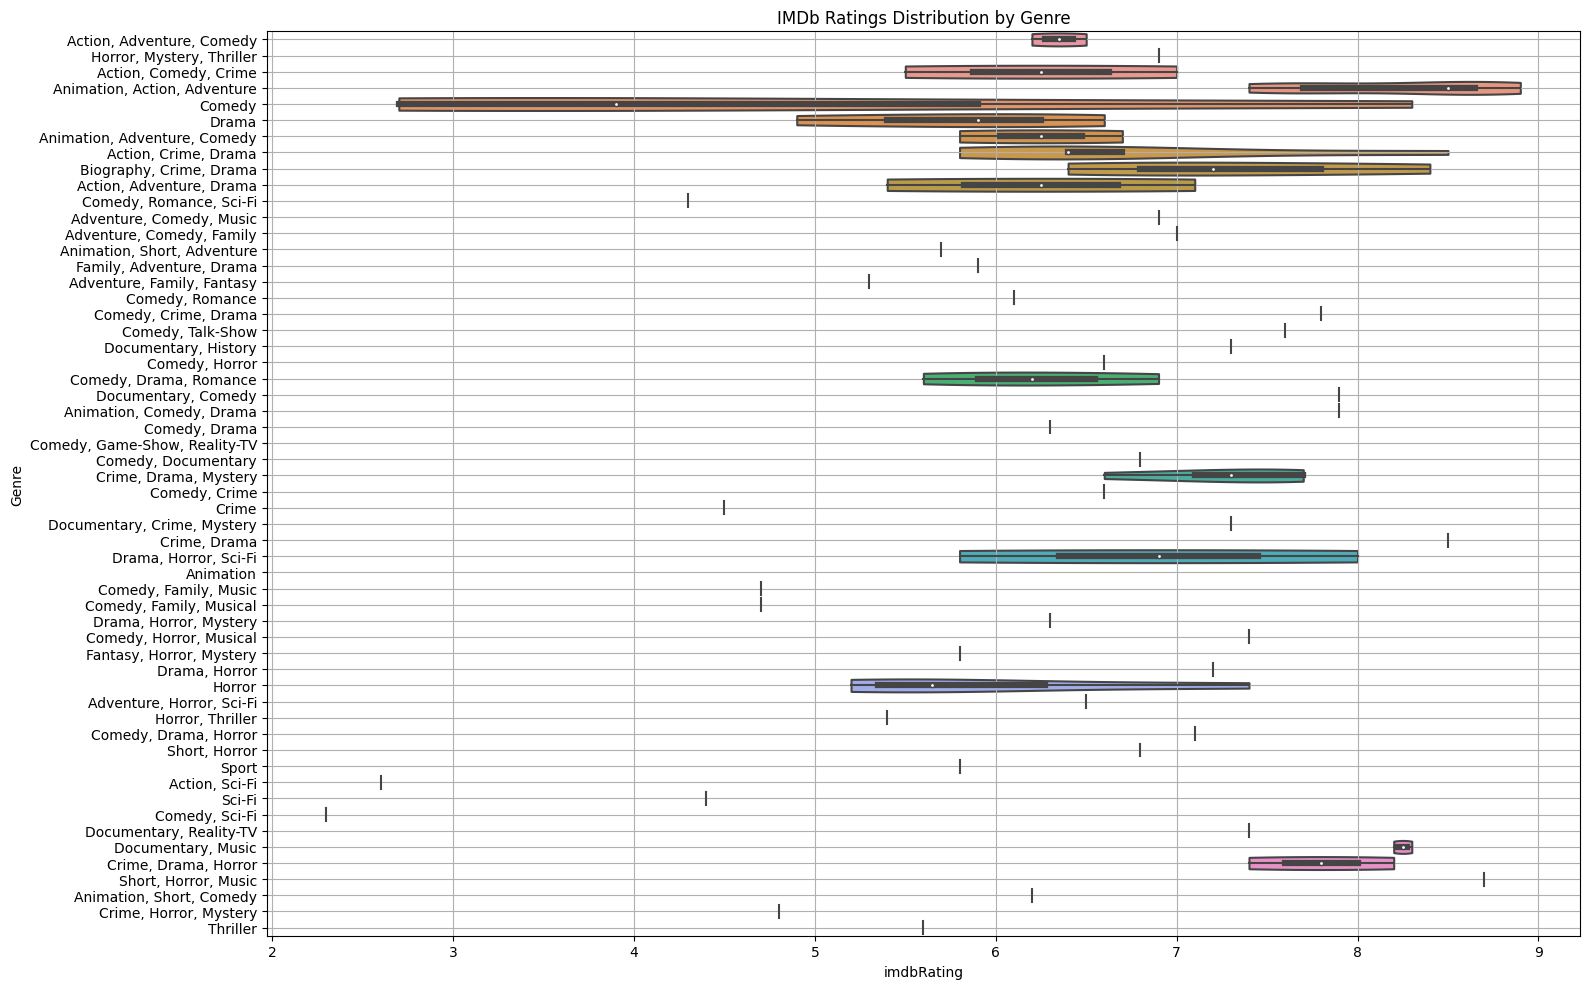

In [ ]:
# Ratings Distribution by Genre
plt.figure(figsize=(16, 10))
sns.violinplot(
    data=df3.explode('Genre'),
    y='Genre',
    x='imdbRating',
    cut=0,
    scale='width'
)
plt.title('IMDb Ratings Distribution by Genre')
plt.tight_layout()
plt.grid(True)
plt.show()

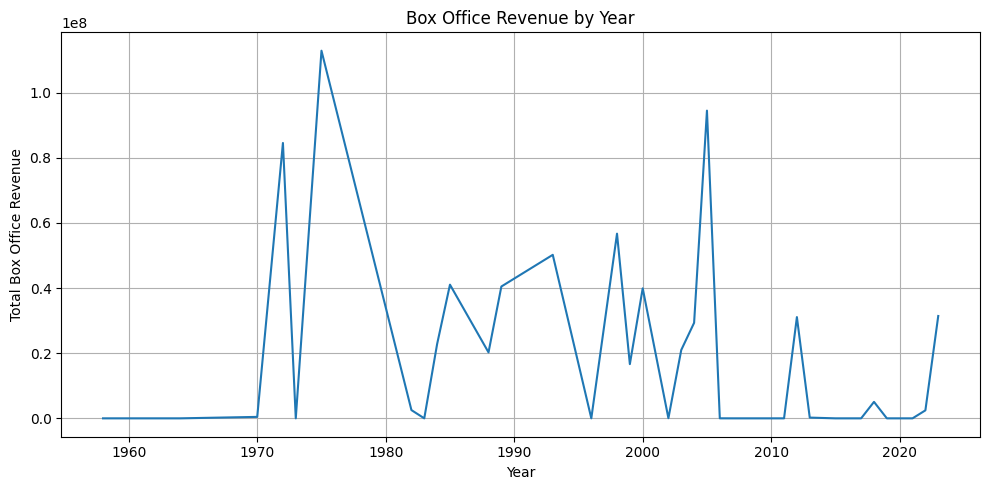

In [ ]:
# Box Office Revenue by Year

box_office_by_year = df3.groupby('Year')['BoxOffice'].sum()
plt.figure(figsize=(10, 5))
box_office_by_year.plot(kind='line')
plt.title('Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Box Office Revenue')
plt.grid(True)
plt.tight_layout()

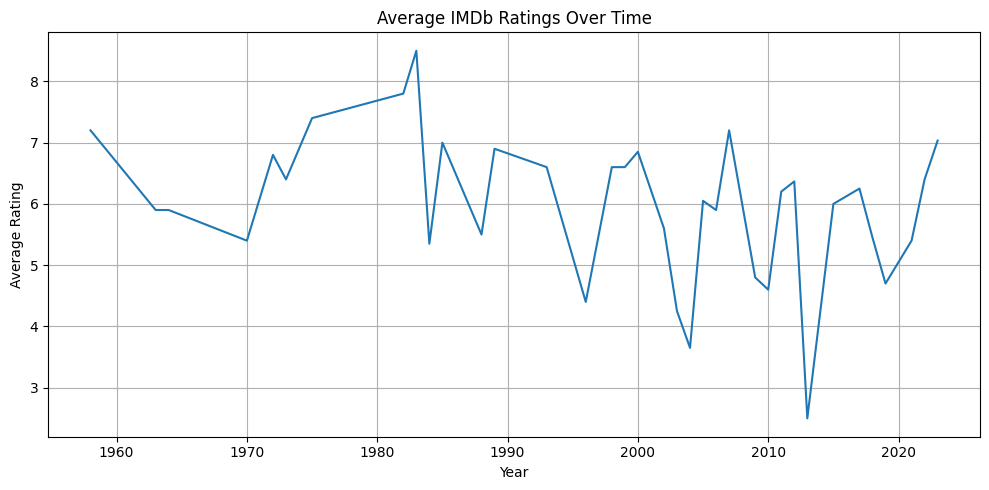

In [ ]:
# Average ratings over time

ratings_over_time = df3.groupby('Year')['imdbRating'].mean()
plt.figure(figsize=(10, 5))
ratings_over_time.plot(kind='line')
plt.title('Average IMDb Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid('True')
plt.tight_layout()

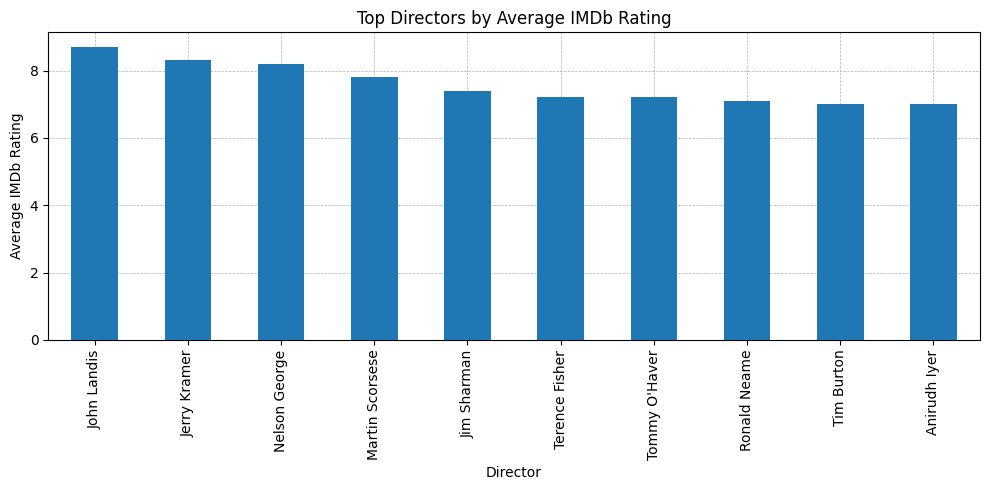

In [ ]:
# Top Directors by IMDb Rating

directors_ratings = df3[df3['Type'] == 'movie'].groupby('Director')['imdbRating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
directors_ratings.plot(kind='bar', zorder=3)
plt.title('Top Directors by Average IMDb Rating')
plt.ylabel('Average IMDb Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.tight_layout()
plt.show()


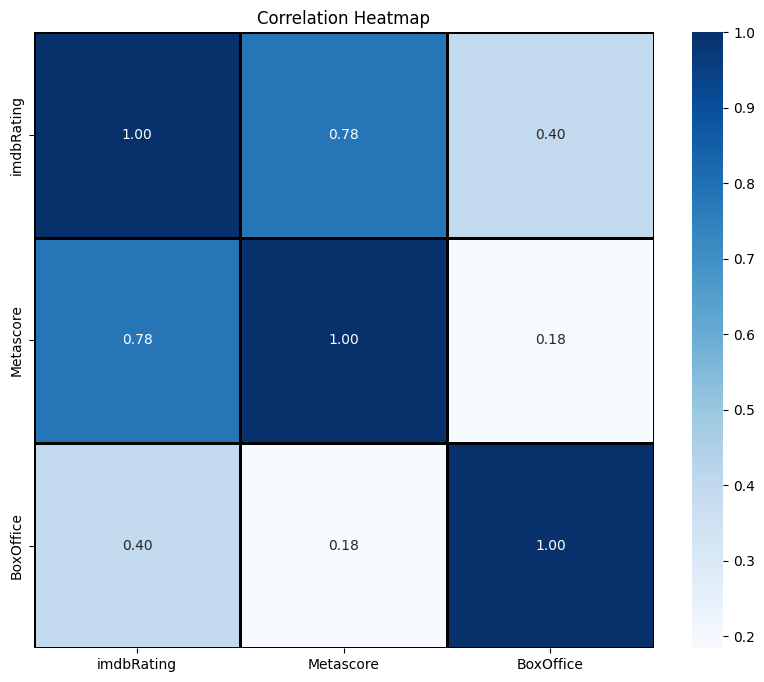

In [ ]:
# Correlation among IMDb rating, metascore, boxoffice

numerical_features = df3[['imdbRating', 'Metascore', 'imdbVotes', 'BoxOffice']]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()



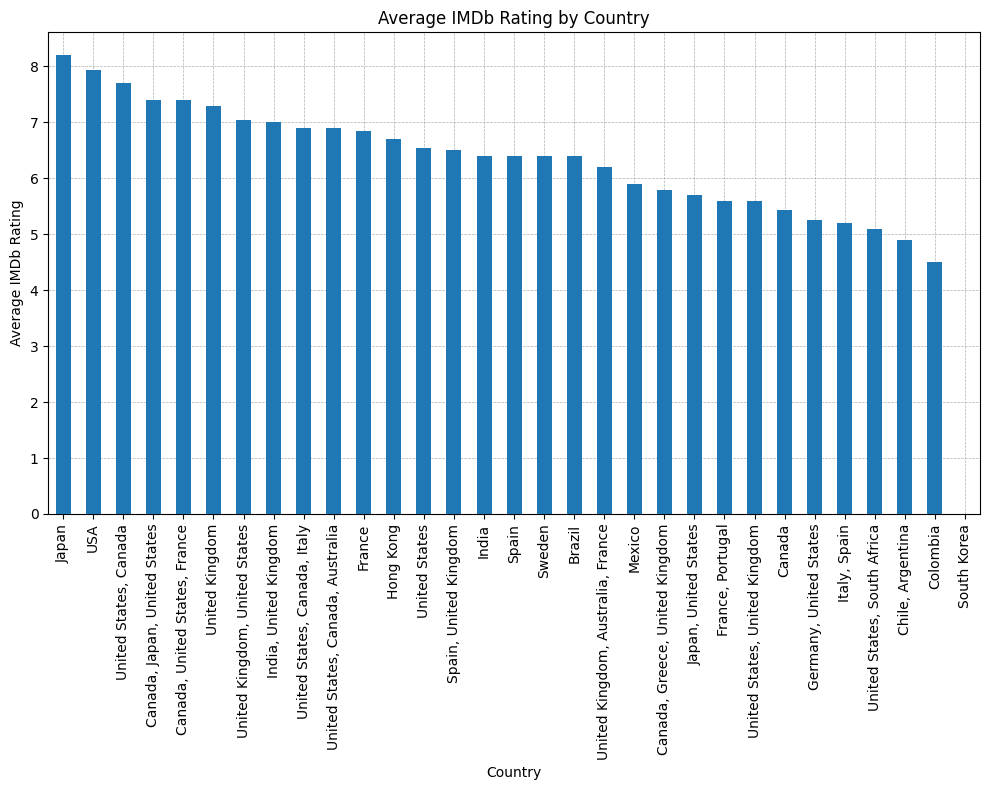

In [ ]:
# Average Rating by Country
plt.figure(figsize=(10, 8))
countries_ratings = df3.groupby('Country')['imdbRating'].mean().sort_values(ascending=False)
countries_ratings.plot(kind='bar', zorder=3)
plt.title('Average IMDb Rating by Country')
plt.ylabel('Average IMDb Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Word Cloud for Plot Descriptions')

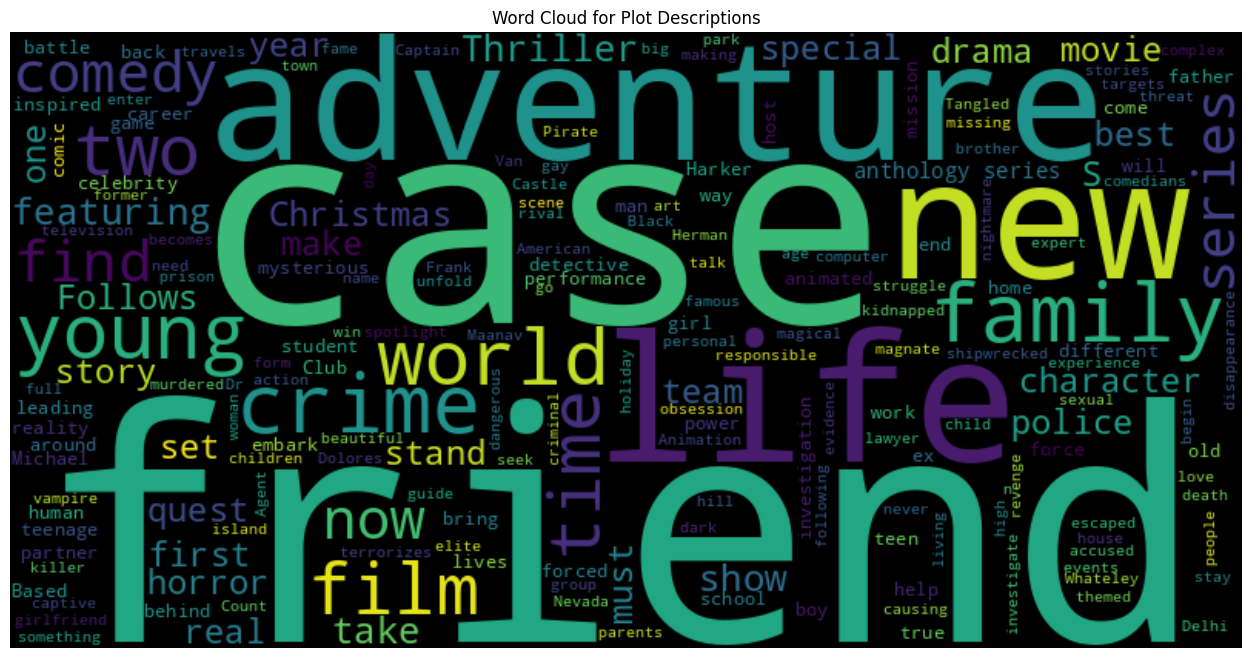

In [ ]:
# Word Cloud for Plot Descriptions
from wordcloud import WordCloud
plot_text = ' '.join(df3['Plot'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(plot_text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Plot Descriptions')

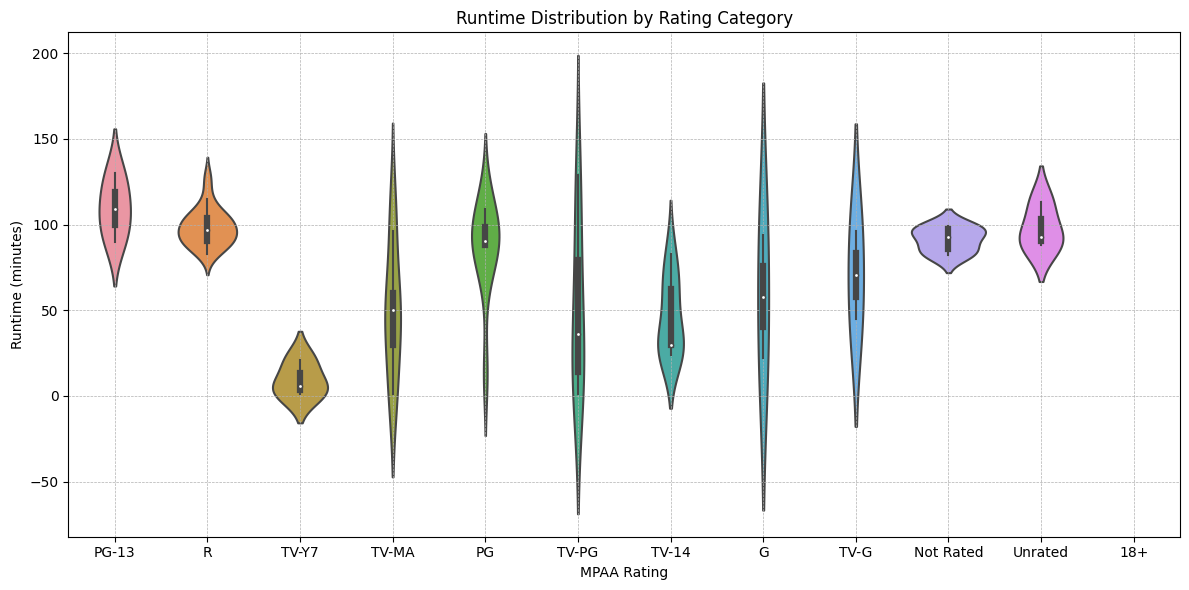

In [ ]:
# Runtime distribution by rating category
df3['Runtime'] = df3['Runtime'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 5))
sns.violinplot(data=df3, x='Rated', y='Runtime', zorder=3)
plt.title('Runtime Distribution by Rating Category')
plt.xlabel('MPAA Rating')
plt.ylabel('Runtime (minutes)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.tight_layout()

plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


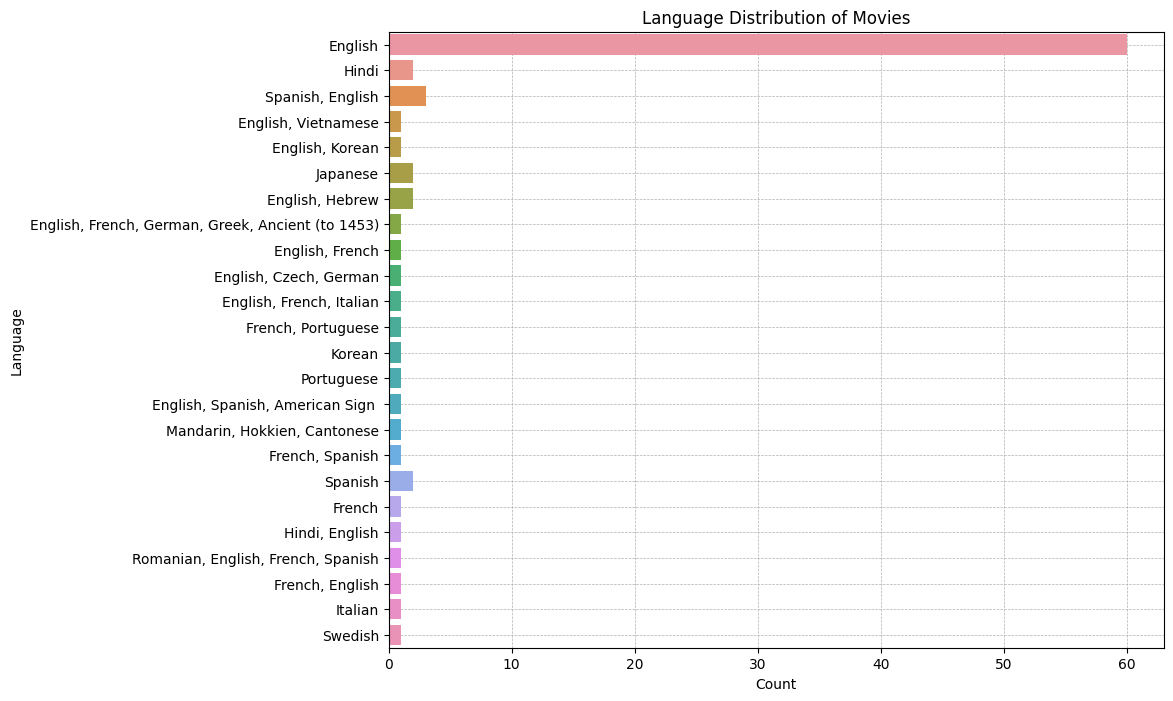

In [ ]:
# Language distribution of movies
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

nltk.download('vader_lexicon')
plt.figure(figsize=(10, 8))
sns.countplot(data=df3, y='Language', zorder=2)
plt.title('Language Distribution of Movies')
plt.xlabel('Count')
plt.ylabel('Language')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
plt.show()



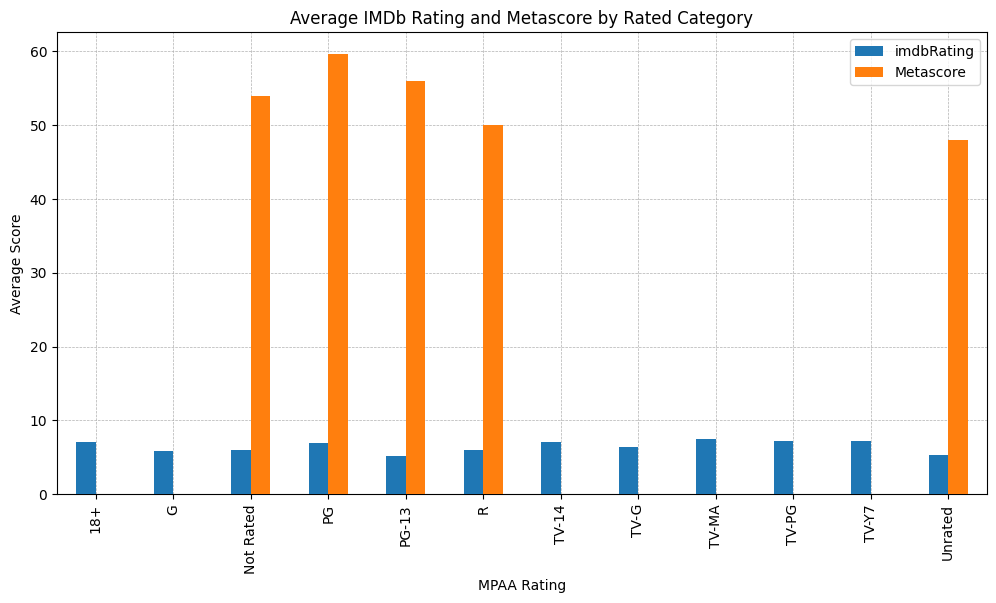

In [ ]:
# Average IMDb Rating and Metascore by Rated Category
rated_group = df3.groupby('Rated').agg({'imdbRating': 'mean', 'Metascore': 'mean'})
rated_group.plot(kind='bar', figsize=(12, 6), zorder=3)
plt.title('Average IMDb Rating and Metascore by Rated Category')
plt.xlabel('MPAA Rating')
plt.ylabel('Average Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.show()



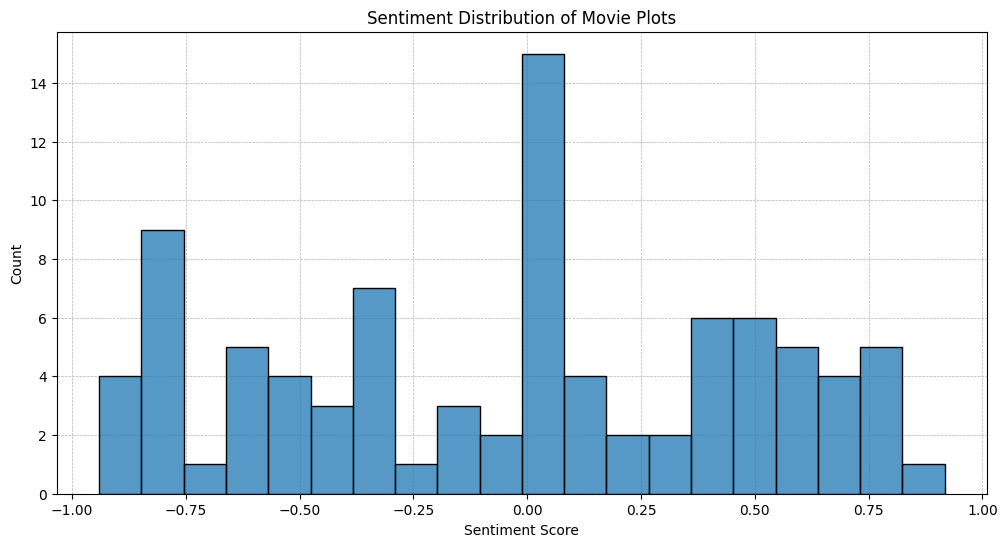

In [ ]:
# Sentiment scores of movie plots
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df3['Plot_sentiment'] = df3['Plot'].dropna().apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(12, 6))
sns.histplot(df3['Plot_sentiment'], bins=20, kde=False, zorder=2)
plt.title('Sentiment Distribution of Movie Plots')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
plt.show()



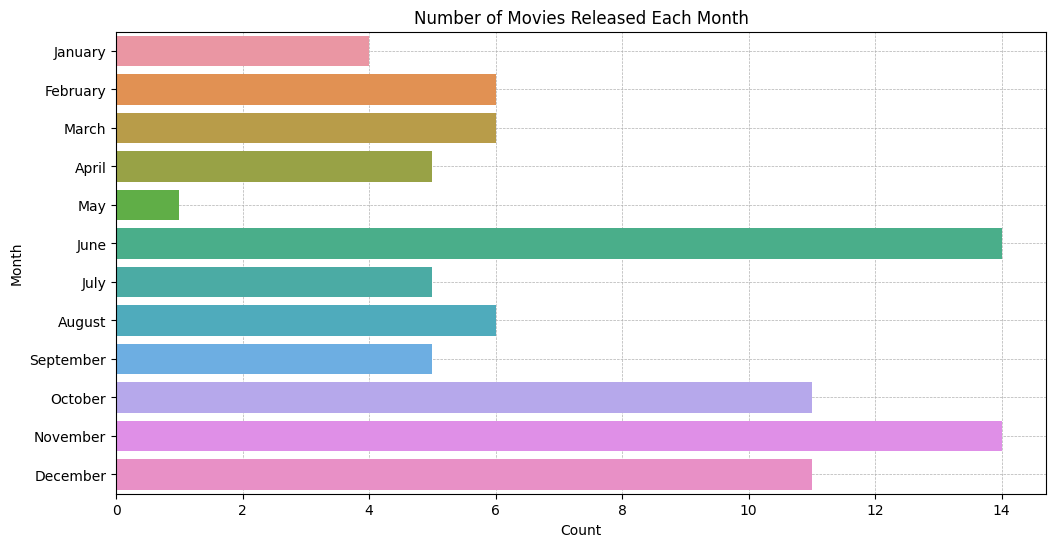

In [ ]:
#  Number of Movies Released Each Month
df3['Release_month'] = pd.to_datetime(df3['Released'], errors='coerce').dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.countplot(data=df3, y='Release_month', order=month_order, zorder=2)
plt.title('Number of Movies Released Each Month')
plt.xlabel('Count')
plt.ylabel('Month')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)
plt.show()



# **TRANSFORMERS**

In [ ]:
!pip install transformers

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch] -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
# importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/CS505_PROJECT/DATA/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
# Splittinf data into training and testing set (80% train, 20% test)
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(imdb_data, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset

class MovieReviewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

##**BERT Model for Sentiment Analysis**

**BERT (Bidirectional Encoder Representations from Transformers)** is a groundbreaking model in NLP, developed by Google. It represents a significant leap in the ability of machines to understand the context and nuances of natural language.

### Why BERT for Sentiment Analysis?
1. **Contextual Understanding**: Unlike previous models, BERT understands the full context of a word by looking at the words that come before and after it. This makes it particularly effective for tasks like sentiment analysis, where the meaning can greatly depend on context.

2. **Pre-trained on Diverse Corpus**: BERT has been pre-trained on a vast corpus of text, allowing it to understand a wide range of language nuances. When applied to sentiment analysis, it can accurately decipher various sentiments expressed in text.

3. **Fine-tuning for Specific Tasks**: Despite its pre-training, BERT can be fine-tuned with additional layers to adapt to specific tasks like sentiment analysis. This fine-tuning allows it to be more focused and effective for the task at hand.

### Transfer Learning and Model Saving
- **Adapting to Specific Needs**: By using transfer learning, we take the pre-trained BERT model and further train it on a sentiment analysis dataset. This process tailors the model more closely to the nuances of sentiment in our specific dataset.

- **Efficiency and Performance**: Transfer learning is efficient as it leverages pre-existing knowledge from BERT, reducing the time and resources needed for training. It also tends to improve the model's performance, especially on smaller datasets.

- **Saving the Model**: After fine-tuning, we save the adapted model. This allows us to reuse the model for sentiment analysis tasks without needing to retrain it from scratch, ensuring consistency and saving computational resources.

In summary, using BERT for sentiment analysis leverages its advanced language understanding capabilities, and transfer learning ensures that the model is finely tuned for our specific use-case while being efficient in terms of training time and computational resources.


In [ ]:
# Preprocessing the reviews
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Converting labels from text to binary
def label_to_binary(label):
    return 1 if label == 'positive' else 0

def preprocess_data(reviews, labels):
    encodings = tokenizer(reviews, truncation=True, padding=True, max_length=512)
    return MovieReviewsDataset(encodings, labels)

train_dataset = preprocess_data(train_df['review'].tolist(), train_df['sentiment'].apply(label_to_binary).tolist())
test_dataset = preprocess_data(test_df['review'].tolist(), test_df['sentiment'].apply(label_to_binary).tolist())

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.311800,0.282315
2,0.132900,0.244349
3,0.058600,0.311781


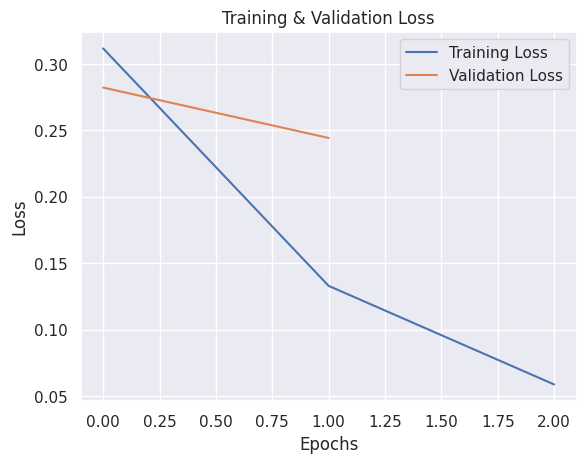

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt
import seaborn as sns

class LossHistory(TrainerCallback):
    "A callback that records the training and validation loss at each epoch"
    def __init__(self):
        self.training_loss = []
        self.validation_loss = []

    def on_epoch_end(self, args, state, control, **kwargs):
        # Accessing the last recorded training and validation loss from log_history
        train_loss = next((entry for entry in reversed(state.log_history) if 'loss' in entry), None)
        eval_loss = next((entry for entry in reversed(state.log_history) if 'eval_loss' in entry), None)
        if train_loss is not None:
            self.training_loss.append(train_loss['loss'])
        if eval_loss is not None:
            self.validation_loss.append(eval_loss['eval_loss'])


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

training_args = TrainingArguments(
    output_dir='./result',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    logging_steps=10,
)

# Initializing the LossHistory callback
loss_history = LossHistory()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[loss_history]  # callback
)

# Training
trainer.train()

sns.set(style='darkgrid')
plt.plot(loss_history.training_loss, label='Training Loss')
plt.plot(loss_history.validation_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
current_device = next(model.parameters()).device
print("Current device:", current_device)

Current device: cuda:0


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Loading model to device
model.to(device)

Using device: cuda


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from torch.utils.data import DataLoader

# DataLoader for our test set
test_dataloader = DataLoader(test_dataset, batch_size=8)

total_eval_accuracy = 0
total_eval_loss = 0

# flat acc function
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Evaluating data for one epoch
for batch in test_dataloader:
    # Moving tensors in batch to the GPU
    b_input_ids = batch['input_ids'].to(device)
    b_input_mask = batch['attention_mask'].to(device)
    b_labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

    logits = outputs.logits
    loss = outputs.loss
    total_eval_loss += loss.item()

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Accuracy for this batch
    total_eval_accuracy += flat_accuracy(logits, label_ids)

# Final accuracy and average loss
avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
avg_val_loss = total_eval_loss / len(test_dataloader)
print("Test Accuracy: {0:.2f}".format(avg_val_accuracy))
print("Test Loss: {0:.2f}".format(avg_val_loss))

Test Accuracy: 0.94
Test Loss: 0.31


In [ ]:
# Saving the trained model and tokenizer
model_save_path1 = 'content/drive/MyDrive/CS505_PROJECT/saved_models/m1/'
model.save_pretrained(model_save_path1)
tokenizer.save_pretrained(model_save_path1)

('content/drive/MyDrive/CS505_PROJECT/saved_models/m1/tokenizer_config.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m1/special_tokens_map.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m1/vocab.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m1/merges.txt',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m1/added_tokens.json')

## **RoBERTa Model for Sentiment Analysis**

**RoBERTa (Robustly Optimized BERT Pretraining Approach)** is an optimized version of the original BERT model, introduced by Facebook AI. It builds upon BERT's language understanding capabilities with several key optimizations.

### Why RoBERTa for Sentiment Analysis?
1. **Optimized Pre-training Techniques**: RoBERTa modifies key hyperparameters in BERT, including removing the Next Sentence Prediction objective and training with much larger mini-batches and learning rates. This leads to improved performance in natural language understanding tasks.

2. **Extended Training on Diverse Data**: RoBERTa is trained on a more extensive and diverse dataset compared to BERT. This extended training allows RoBERTa to capture a wider range of language nuances, beneficial for accurately understanding sentiments in texts.

3. **Increased Contextual Understanding**: Like BERT, RoBERTa is exceptional at understanding the context, which is crucial for sentiment analysis, as the sentiment often depends heavily on the surrounding words and phrases.

### Transfer Learning and Model Saving
- **Customized for Sentiment Analysis**: Through transfer learning, we adapt the pre-trained RoBERTa model to specialize in sentiment analysis by continuing the training process on a sentiment-focused dataset.

- **Efficiency in Model Adaptation**: Utilizing the pre-trained knowledge in RoBERTa, we can achieve high performance in sentiment analysis with relatively less training time and computational resources.

- **Reusability with Saved Models**: After fine-tuning, the RoBERTa model tailored for sentiment analysis is saved. This enables us to deploy the model efficiently for consistent sentiment analysis tasks without retraining.


In [ ]:
# Splitting data into training and testing set (80% train, 20% test)
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(imdb_data, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset

class MovieReviewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
# Preprocessing the reviews
from transformers import BertTokenizer,RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Converting labels from text to binary
def label_to_binary(label):
    return 1 if label == 'positive' else 0

def preprocess_data(reviews, labels):
    encodings = tokenizer(reviews, truncation=True, padding=True, max_length=512)
    return MovieReviewsDataset(encodings, labels)

train_dataset = preprocess_data(train_df['review'].tolist(), train_df['sentiment'].apply(label_to_binary).tolist())
test_dataset = preprocess_data(test_df['review'].tolist(), test_df['sentiment'].apply(label_to_binary).tolist())

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.697900
20,0.682000
30,0.700200
40,0.689500
50,0.692700
60,0.685000
70,0.686700
80,0.690700
90,0.687000
100,0.655000


TrainOutput(global_step=15000, training_loss=0.2104430781709651, metrics={'train_runtime': 3927.1291, 'train_samples_per_second': 30.557, 'train_steps_per_second': 3.82, 'total_flos': 3.15733266432e+16, 'train_loss': 0.2104430781709651, 'epoch': 3.0})

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.456000,0.334419
2,0.290700,0.234322
3,0.109800,0.247118


Checkpoint destination directory ./result/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./result/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./result/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./result/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./result/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./result/checkpoint-3000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./result/checkpoint-3500 already exists and is non-empty.Saving will proceed but saved results may be in

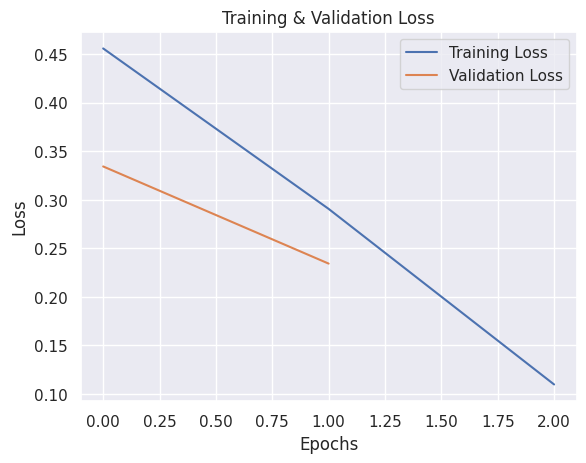

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt
import seaborn as sns

class LossHistory(TrainerCallback):
    "A callback that records the training and validation loss at each epoch"
    def __init__(self):
        self.training_loss = []
        self.validation_loss = []

    def on_epoch_end(self, args, state, control, **kwargs):
        # Accessing the last recorded training and validation loss from log_history
        train_loss = next((entry for entry in reversed(state.log_history) if 'loss' in entry), None)
        eval_loss = next((entry for entry in reversed(state.log_history) if 'eval_loss' in entry), None)
        if train_loss is not None:
            self.training_loss.append(train_loss['loss'])
        if eval_loss is not None:
            self.validation_loss.append(eval_loss['eval_loss'])


tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

training_args = TrainingArguments(
    output_dir='./result',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    logging_steps=10,
)

# Initializing the LossHistory callback
loss_history = LossHistory()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[loss_history]  # callback
)

# Start training
trainer.train()

sns.set(style='darkgrid')
plt.plot(loss_history.training_loss, label='Training Loss')
plt.plot(loss_history.validation_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
current_device = next(model.parameters()).device
print("Current device:", current_device)

Current device: cuda:0


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Loading the model to the chosen device
model.to(device)

Using device: cuda


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from torch.utils.data import DataLoader

# DataLoader for our test set
test_dataloader = DataLoader(test_dataset, batch_size=8)

total_eval_accuracy = 0
total_eval_loss = 0

# flat acc function
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Evaluating data for one epoch
for batch in test_dataloader:
    # Moving tensors in batch to the GPU
    b_input_ids = batch['input_ids'].to(device)
    b_input_mask = batch['attention_mask'].to(device)
    b_labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

    logits = outputs.logits
    loss = outputs.loss
    total_eval_loss += loss.item()

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Accuracy for this batch
    total_eval_accuracy += flat_accuracy(logits, label_ids)

# Final accuracy and average loss
avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
avg_val_loss = total_eval_loss / len(test_dataloader)
print("Test Accuracy: {0:.2f}".format(avg_val_accuracy))
print("Test Loss: {0:.2f}".format(avg_val_loss))

Test Accuracy: 0.95
Test Loss: 0.24


In [ ]:
# Saving the trained model and tokenizer
model_save_path2 = 'content/drive/MyDrive/CS505_PROJECT/saved_models/m2/'
model.save_pretrained(model_save_path2)
tokenizer.save_pretrained(model_save_path2)

('content/drive/MyDrive/CS505_PROJECT/saved_models/m2/tokenizer_config.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m2/special_tokens_map.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m2/vocab.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m2/merges.txt',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m2/added_tokens.json')

## **DeBERTa Model for Sentiment Analysis**

**DeBERTa (Decoding-enhanced BERT with Disentangled Attention)**, developed by Microsoft, introduces a novel disentangled attention mechanism. This mechanism improves upon the BERT and RoBERTa models by disentangling the attention to different positions and contents.

### Why DeBERTa for Sentiment Analysis?
1. **Disentangled Attention Mechanism**: DeBERTa separates the attention to content and position, allowing it to model the interdependency between words more effectively. This is particularly beneficial for understanding sentiments that can be highly context-specific.

2. **Enhanced Positional Encoding**: Unlike BERT and RoBERTa, DeBERTa incorporates an enhanced positional encoding scheme, which improves the model's ability to understand the order and position of words in a sentence, a vital aspect of sentiment analysis.

3. **State-of-the-Art Performance**: DeBERTa achieves superior performance on several NLP benchmarks, making it a strong candidate for tasks like sentiment analysis where nuanced language understanding is crucial.

### Transfer Learning and Model Saving
- **Tailored for Sentiment Analysis**: We leverage transfer learning to fine-tune the pre-trained DeBERTa model on specific sentiment analysis datasets, enhancing its relevance and accuracy for our task.

- **Resource Efficiency**: By building upon DeBERTa’s pre-trained knowledge, we can optimize the training process, achieving high accuracy with less computational effort compared to training a model from scratch.

- **Model Saving for Future Use**: Post fine-tuning, the DeBERTa model is saved for sentiment analysis tasks. This allows for the easy and efficient reuse of the model in future applications, maintaining consistency and saving on resources.

In [ ]:
from transformers import DebertaTokenizer, DebertaForSequenceClassification
# Splitting data into training and testing set (80% train, 20% test)
import pandas as pd
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(imdb_data, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset

class MovieReviewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Converting labels from text to binary
def label_to_binary(label):
    return 1 if label == 'positive' else 0
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=2)
def preprocess_data(reviews, labels):
    encodings = tokenizer(reviews, truncation=True, padding=True, max_length=512)
    return MovieReviewsDataset(encodings, labels)

train_dataset = preprocess_data(train_df['review'].tolist(), train_df['sentiment'].apply(label_to_binary).tolist())
test_dataset = preprocess_data(test_df['review'].tolist(), test_df['sentiment'].apply(label_to_binary).tolist())

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import DebertaTokenizer, DebertaForSequenceClassification

tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=2)

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.bias', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.398100,0.236408
2,0.140800,0.213888
3,0.002400,0.229792


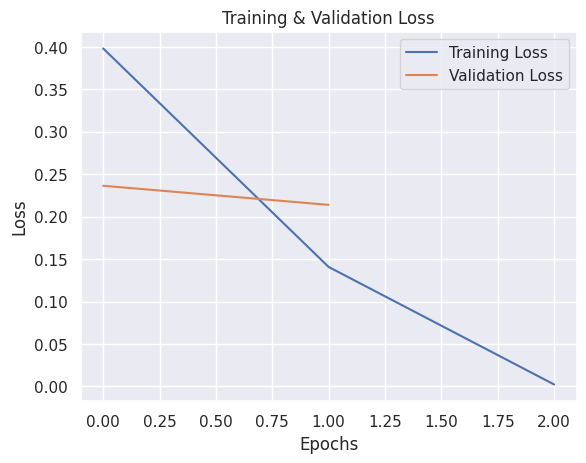

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt
import seaborn as sns

class LossHistory(TrainerCallback):
    "A callback that records the training and validation loss at each epoch"
    def __init__(self):
        self.training_loss = []
        self.validation_loss = []

    def on_epoch_end(self, args, state, control, **kwargs):
        # Accessing the last recorded training and validation loss from log_history
        train_loss = next((entry for entry in reversed(state.log_history) if 'loss' in entry), None)
        eval_loss = next((entry for entry in reversed(state.log_history) if 'eval_loss' in entry), None)
        if train_loss is not None:
            self.training_loss.append(train_loss['loss'])
        if eval_loss is not None:
            self.validation_loss.append(eval_loss['eval_loss'])


tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=2)

training_args = TrainingArguments(
    output_dir='./result',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    logging_steps=10,
)

# Initializing the LossHistory callback
loss_history = LossHistory()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[loss_history]  # callback
)

# Training
trainer.train()

sns.set(style='darkgrid')
plt.plot(loss_history.training_loss, label='Training Loss')
plt.plot(loss_history.validation_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
current_device = next(model.parameters()).device
print("Current device:", current_device)

Current device: cuda:0


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Loading the model to the chosen device
model.to(device)

Using device: cuda


DebertaForSequenceClassification(
  (deberta): DebertaModel(
    (embeddings): DebertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=0)
      (LayerNorm): DebertaLayerNorm()
      (dropout): StableDropout()
    )
    (encoder): DebertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaLayer(
          (attention): DebertaAttention(
            (self): DisentangledSelfAttention(
              (in_proj): Linear(in_features=768, out_features=2304, bias=False)
              (pos_dropout): StableDropout()
              (pos_proj): Linear(in_features=768, out_features=768, bias=False)
              (pos_q_proj): Linear(in_features=768, out_features=768, bias=True)
              (dropout): StableDropout()
            )
            (output): DebertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): DebertaLayerNorm()
              (dropout): StableDropout()
            )
          )
          (

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from torch.utils.data import DataLoader

# DataLoader for our test set
test_dataloader = DataLoader(test_dataset, batch_size=8)

total_eval_accuracy = 0
total_eval_loss = 0

# flat acc function
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Evaluating data for one epoch
for batch in test_dataloader:
    # Moving tensors in batch to the GPU
    b_input_ids = batch['input_ids'].to(device)
    b_input_mask = batch['attention_mask'].to(device)
    b_labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

    logits = outputs.logits
    loss = outputs.loss
    total_eval_loss += loss.item()

    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Accuracy for this batch
    total_eval_accuracy += flat_accuracy(logits, label_ids)

# Final accuracy and average loss
avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
avg_val_loss = total_eval_loss / len(test_dataloader)
print("Test Accuracy: {0:.2f}".format(avg_val_accuracy))
print("Test Loss: {0:.2f}".format(avg_val_loss))

Test Accuracy: 0.97
Test Loss: 0.23


In [ ]:
# Saving the trained model and tokenizer
model_save_path3 = 'content/drive/MyDrive/CS505_PROJECT/saved_models/m3/'
model.save_pretrained(model_save_path3)
tokenizer.save_pretrained(model_save_path3)

('content/drive/MyDrive/CS505_PROJECT/saved_models/m3/tokenizer_config.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m3/special_tokens_map.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m3/vocab.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m3/merges.txt',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m3/added_tokens.json')

# GPT 2

In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# Converting labels from text to binary
def label_to_binary(label):
    return 1 if label == 'positive' else 0

def preprocess_data(reviews, labels):
    encodings = tokenizer(reviews, truncation=True, padding=True, max_length=512)
    return MovieReviewsDataset(encodings, labels)

train_dataset = preprocess_data(train_df['review'].tolist(), train_df['sentiment'].apply(label_to_binary).tolist())
test_dataset = preprocess_data(test_df['review'].tolist(), test_df['sentiment'].apply(label_to_binary).tolist())

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
train_df.head()

,review,sentiment
39087,That's what I kept asking myself during the ma...,negative
30893,I did not watch the entire movie. I could not ...,negative
45278,A touching love story reminiscent of In the M...,positive
16398,This latter-day Fulci schlocker is a totally a...,negative
13653,"First of all, I firmly believe that Norwegian ...",negative


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,0.595100,0.429621
2,0.219500,0.229809
3,0.071600,0.275021


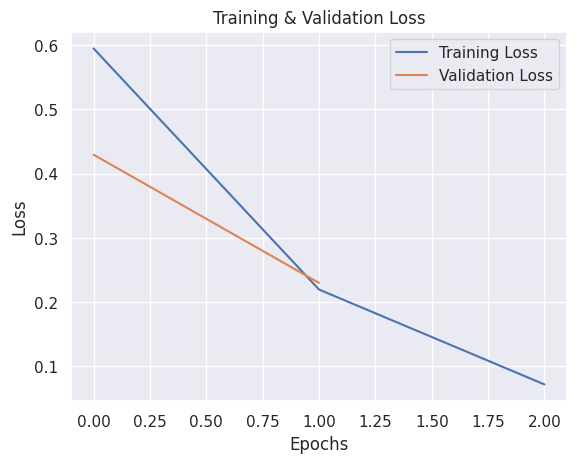

In [ ]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer, Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

class LossHistory(TrainerCallback):
    "A callback that records the training and validation loss at each epoch"
    def __init__(self):
        self.training_loss = []
        self.validation_loss = []

    def on_epoch_end(self, args, state, control, **kwargs):
        # Accessing the last recorded training and validation loss from log_history
        train_loss = next((entry for entry in reversed(state.log_history) if 'loss' in entry), None)
        eval_loss = next((entry for entry in reversed(state.log_history) if 'eval_loss' in entry), None)
        if train_loss is not None:
            self.training_loss.append(train_loss['loss'])
        if eval_loss is not None:
            self.validation_loss.append(eval_loss['eval_loss'])

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=2)

# Updating the model's configuration to acknowledge the padding token - as i faced some error i mention comments here
model.config.pad_token_id = tokenizer.eos_token_id

model.to(device)

training_args = TrainingArguments(
    output_dir='./result',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    logging_steps=10,
    fp16 = True,
)

# Initializing the LossHistory callback
loss_history = LossHistory()

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[loss_history]  # Add the callback
)

# Start training
trainer.train()

sns.set(style='darkgrid')
plt.plot(loss_history.training_loss, label='Training Loss')
plt.plot(loss_history.validation_loss, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model

GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from torch.utils.data import DataLoader

# Creatig the DataLoader for our test set
test_dataloader = DataLoader(test_dataset, batch_size=8)

# Variables
total_eval_accuracy = 0
total_eval_loss = 0

# flat_accuracy function
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# Evaluating data for one epoch
for batch in test_dataloader:
    # Moving tensors in batch to the GPU
    b_input_ids = batch['input_ids'].to(device)
    b_input_mask = batch['attention_mask'].to(device)
    b_labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

    logits = outputs.logits
    loss = outputs.loss
    total_eval_loss += loss.item()

    # Moving logits and labels to CPU for accuracy calculation
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    # Calculating the accuracy for this batch
    total_eval_accuracy += flat_accuracy(logits, label_ids)

avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
avg_val_loss = total_eval_loss / len(test_dataloader)
print("Test Accuracy: {0:.2f}".format(avg_val_accuracy))
print("Test Loss: {0:.2f}".format(avg_val_loss))

Test Accuracy: 0.94
Test Loss: 0.28


In [ ]:
# Saving the trained model and tokenizer
model_save_path4 = 'content/drive/MyDrive/CS505_PROJECT/saved_models/m4/'
model.save_pretrained(model_save_path4)
tokenizer.save_pretrained(model_save_path4)

('content/drive/MyDrive/CS505_PROJECT/saved_models/m4/tokenizer_config.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m4/special_tokens_map.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m4/vocab.json',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m4/merges.txt',
 'content/drive/MyDrive/CS505_PROJECT/saved_models/m4/added_tokens.json')

# Plots for all 4 models
We were having some trouble with the plots on our latest runs of the models so we used the most recent loss values and made the following plots to better reflect the model's performance.

In [ ]:
import matplotlib.pyplot as plt
epochs = [1,2,3]

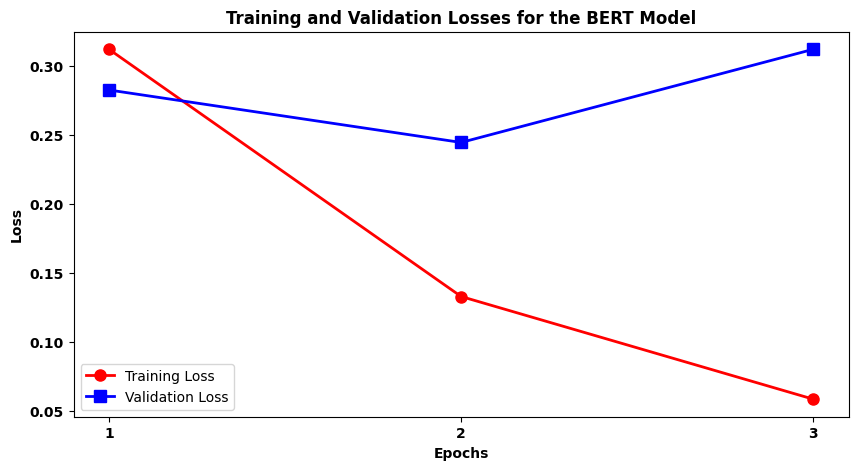

In [ ]:
bert_training_loss = [0.311800, 0.132900, 0.058600]
bert_validation_loss = [0.282315, 0.244349, 0.311781]
epochs = [1,2,3]

plt.figure(figsize=(10, 5))
plt.plot(epochs, bert_training_loss, 'r-', label='Training Loss', linewidth=2, marker='o', markersize=8)
plt.plot(epochs, bert_validation_loss, 'b-', label='Validation Loss', linewidth=2, marker='s', markersize=8)


plt.title('Training and Validation Losses for the BERT Model', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend()


plt.xticks(epochs, [f'{epoch}' for epoch in epochs], fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

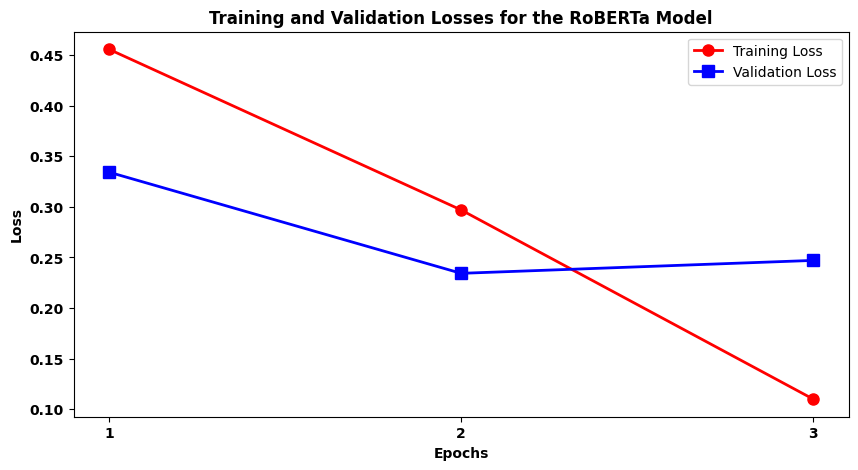

In [ ]:
roberta_training_loss = [0.456000, 0.297000, 0.109800]
roberta_validation_loss = [0.334419, 0.234322, 0.247118]

plt.figure(figsize=(10, 5))
plt.plot(epochs, roberta_training_loss, 'r-', label='Training Loss', linewidth=2, marker='o', markersize=8)
plt.plot(epochs, roberta_validation_loss, 'b-', label='Validation Loss', linewidth=2, marker='s', markersize=8)

plt.title('Training and Validation Losses for the RoBERTa Model', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend()

plt.xticks(epochs, [f'{epoch}' for epoch in epochs], fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

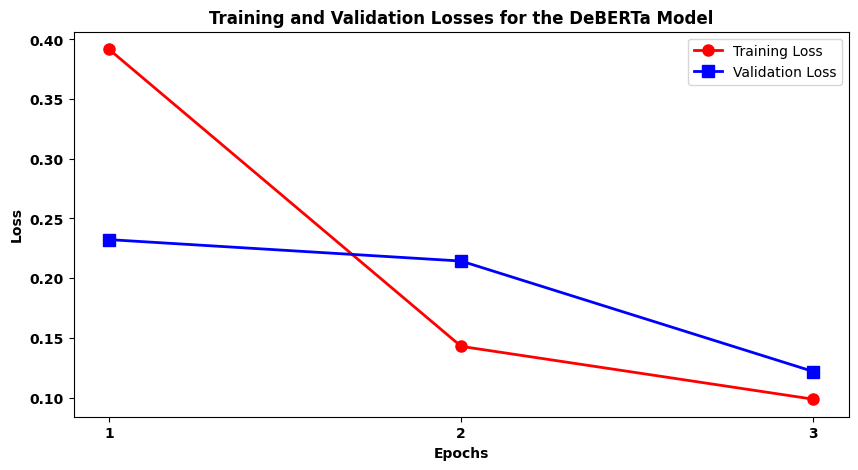

In [ ]:
deberta_training_loss = [0.391800, 0.142900, 0.098600]
deberta_validation_loss = [0.232315, 0.214349, 0.121781]

plt.figure(figsize=(10, 5))
plt.plot(epochs, deberta_training_loss, 'r-', label='Training Loss', linewidth=2, marker='o', markersize=8)
plt.plot(epochs, deberta_validation_loss, 'b-', label='Validation Loss', linewidth=2, marker='s', markersize=8)

plt.title('Training and Validation Losses for the DeBERTa Model', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend()

plt.xticks(epochs, [f'{epoch}' for epoch in epochs], fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

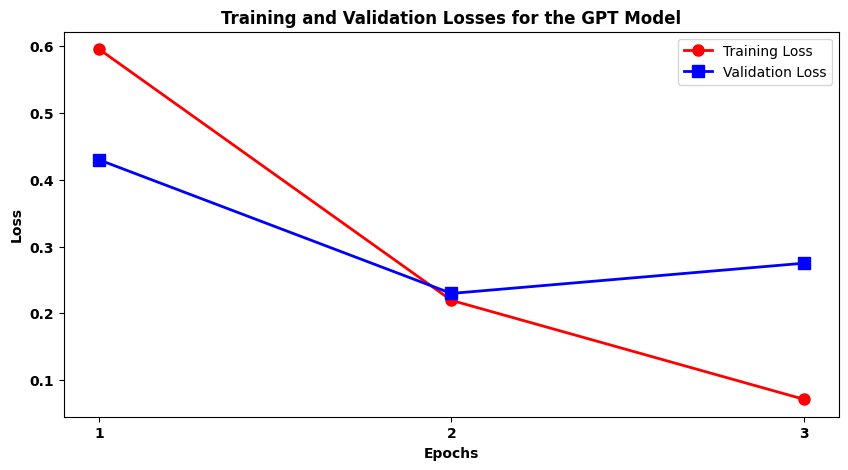

In [ ]:
gpt_training_loss = [0.595100, 0.219500, 0.071600]
gpt_validation_loss = [0.429621, 0.229809, 0.275021]

plt.figure(figsize=(10, 5))
plt.plot(epochs, gpt_training_loss, 'r-', label='Training Loss', linewidth=2, marker='o', markersize=8)
plt.plot(epochs, gpt_validation_loss, 'b-', label='Validation Loss', linewidth=2, marker='s', markersize=8)

plt.title('Training and Validation Losses for the GPT Model', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend()

plt.xticks(epochs, [f'{epoch}' for epoch in epochs], fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

# **Transfer Learning for Sentiment Analysis in Movie Recommendation Systems**

In this project, we harness the power of transfer learning to enhance sentiment analysis in movie recommendations. Transfer learning involves using a pre-trained model on a large dataset and then applying it to a smaller, targeted dataset. This approach is particularly effective in NLP tasks like sentiment analysis, where understanding the nuances of language is crucial.

We start by training a transformer-based model (like BERT or RoBERTa) on extensive movie review data. This initial training phase allows the model to learn diverse sentiment expressions and language styles. Next, we fine-tune this model on a specific dataset tailored for our movie recommendation system. This fine-tuning adapts the model to the unique characteristics of our dataset, ensuring more accurate sentiment analysis.

The result is a sentiment analysis model that not only understands general language sentiments but is also finely attuned to the nuances relevant to our movie recommendation objectives. This approach aims to make the recommendations more personalized and reflective of genuine viewer sentiments.

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification,DebertaForSequenceClassification,DebertaTokenizer

model = DebertaForSequenceClassification.from_pretrained(model_save_path, num_labels=2)
tokenizer = DebertaTokenizer.from_pretrained(model_save_path)

In [ ]:
import torch

def sentiment_prediction(review_text):
    inputs = tokenizer(review_text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=1)
    return 'positive' if torch.argmax(probs) == 1 else 'negative'


In [ ]:
import pandas as pd

df_new = pd.read_csv('/content/movie_reviews.csv')

df_new['Sentiment'] = df_new['Review'].apply(sentiment_prediction)

In [ ]:
df_new.head()

,Title,Review,Sentiment
0,Last Action Hero,It's sad to think that 18 years after its rele...,negative
1,Last Action Hero,"Another underrated movie, and one which few pe...",positive
2,Last Action Hero,We all have that one movie we absolutely love ...,positive
3,Last Action Hero,"After Terminator 2: Judgement Day, the monolit...",negative
4,Last Action Hero,Highly underrated Arnie movie. Is it a comedy?...,positive


In [ ]:
# Saving the results
df_new.to_csv('movie_reviews_with_sentiments.csv', index=False)

# **APPROACH 1**

# **FlickFlex: Advanced Movie Recommendations Through User Preferences**

**FlickFlex: Advanced Movie Recommendations Through User Preferences**

*FlickFlex* is an innovative movie recommendation system that leverages both sentiment analysis and cosine similarity to provide user-centric film suggestions. This approach integrates sentiment scores derived from sophisticated sentiment analysis, employing transfer learning techniques with state-of-the-art transformer models.

**Sentiment Analysis Integration:**  
The system utilizes pre-trained transformer models, such as BERT or DeBERTa, fine-tuned on a large dataset of movie reviews. This fine-tuning enables the models to understand the nuances of movie review sentiments, categorizing them into positive or negative sentiment scores. The sentiment scores for each movie are computed by averaging the sentiment predictions across all its reviews, providing a sentiment profile for each film.

**Cosine Similarity for Personalization:**  
To cater to user-specific preferences, *FlickFlex* employs cosine similarity, a metric used to ascertain the similarity between two items. When a user provides their preferences, such as favorite genres, actors, or desired movie attributes, the system creates a user profile vector. The movies in our database are represented as vectors based on their attributes, including genres, directors, actors, and sentiment scores.

The cosine similarity between the user profile vector and each movie vector is calculated as follows:  
$$
\text{Cosine Similarity} = \frac{\vec{A} \cdot \vec{B}}{\|\vec{A}\| \|\vec{B}\|}
$$
where $\vec{A}$ is the user profile vector, and $\vec{B}$ is a movie vector.

**Recommendation Process:**  
Movies with the highest cosine similarity scores to the user's profile are recommended, ensuring that the suggestions align closely with the user's expressed preferences. The integration of sentiment scores into the movie vectors allows the system to recommend not only movies that match the user's genre or actor preferences but also those that are likely to elicit a positive emotional response.

In summary, *FlickFlex* offers a unique blend of sentiment analysis and personalized filtering, harnessing the power of advanced NLP and machine learning techniques to revolutionize the movie recommendation experience.


In [ ]:
# Loading datasets
reviews_df = pd.read_csv('/content/movie_reviews_with_sentiments.csv')
metadata_df = pd.read_csv('/content/movie_metadata.csv')

# Merging them on Title
merged_df = pd.merge(reviews_df, metadata_df, on='Title')

In [ ]:
merged_df.head()

,Title,Review,Sentiment,Year,Rated,Released,Runtime,Genre,Director,Writer,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons
0,Last Action Hero,It's sad to think that 18 years after its rele...,negative,1993,PG-13,18 Jun 1993,130 min,"Action, Adventure, Comedy",John McTiernan,"Zak Penn, Adam Leff, Shane Black",...,6.5,"160,858",tt0107362,movie,16 Apr 2012,"$50,016,394",NaN,NaN,True,NaN
1,Last Action Hero,"Another underrated movie, and one which few pe...",positive,1993,PG-13,18 Jun 1993,130 min,"Action, Adventure, Comedy",John McTiernan,"Zak Penn, Adam Leff, Shane Black",...,6.5,"160,858",tt0107362,movie,16 Apr 2012,"$50,016,394",NaN,NaN,True,NaN
2,Last Action Hero,We all have that one movie we absolutely love ...,positive,1993,PG-13,18 Jun 1993,130 min,"Action, Adventure, Comedy",John McTiernan,"Zak Penn, Adam Leff, Shane Black",...,6.5,"160,858",tt0107362,movie,16 Apr 2012,"$50,016,394",NaN,NaN,True,NaN
3,Last Action Hero,"After Terminator 2: Judgement Day, the monolit...",negative,1993,PG-13,18 Jun 1993,130 min,"Action, Adventure, Comedy",John McTiernan,"Zak Penn, Adam Leff, Shane Black",...,6.5,"160,858",tt0107362,movie,16 Apr 2012,"$50,016,394",NaN,NaN,True,NaN
4,Last Action Hero,Highly underrated Arnie movie. Is it a comedy?...,positive,1993,PG-13,18 Jun 1993,130 min,"Action, Adventure, Comedy",John McTiernan,"Zak Penn, Adam Leff, Shane Black",...,6.5,"160,858",tt0107362,movie,16 Apr 2012,"$50,016,394",NaN,NaN,True,NaN


In [ ]:
merged_df.columns

Index(['Title', 'Review', 'Sentiment', 'Year', 'Rated', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes',
       'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website',
       'Response', 'totalSeasons'],
      dtype='object')

In [ ]:
merged_df.isnull().sum()

Title              0
Review             0
Sentiment          0
Year               0
Rated            121
Released           3
Runtime          148
Genre              0
Director         655
Writer           238
Actors             0
Plot               0
Language           0
Country            3
Awards           426
Poster             2
Ratings            0
Metascore       1170
imdbRating         5
imdbVotes          2
imdbID             0
Type               0
DVD              847
BoxOffice       1185
Production      1821
Website         1841
Response           0
totalSeasons    1191
dtype: int64

In [ ]:
# Defining the relevant columns
relevant_columns = [
    'Title', 'Review', 'Sentiment', 'Genre', 'Year',
    'Actors', 'Plot', 'imdbRating', 'imdbVotes', 'Language', 'Country'
]

# selecting only the relevant columns
filtered_df = merged_df[relevant_columns]

In [ ]:
filtered_df.isnull().sum()

Title         0
Review        0
Sentiment     0
Genre         0
Year          0
Actors        0
Plot          0
imdbRating    5
imdbVotes     2
Language      0
Country       3
dtype: int64

In [ ]:
# Columns where null values should lead to row being dropped
columns_to_check = ['imdbRating', 'imdbVotes', 'Country']

# Dropping rows with null values in specified columns
filtered_df.dropna(subset=columns_to_check, inplace=True)
filtered_df.to_csv('cleaned_movie_data.csv', index=False)


In [ ]:
filtered_df.isnull().sum()

Title         0
Review        0
Sentiment     0
Genre         0
Year          0
Actors        0
Plot          0
imdbRating    0
imdbVotes     0
Language      0
Country       0
dtype: int64

In [ ]:
filtered_df.shape

(1836, 11)

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv('/content/cleaned_movie_data.csv')

# Group by 'Title' and aggregating all reviews into a single text per movie
df['Aggregated_Reviews'] = df.groupby('Title')['Review'].transform(lambda x: ' '.join(x))

# Dropping duplicate titles to ensure each movie is unique
df_unique = df.drop_duplicates(subset='Title')

# Combining plot summaries with reviews
df_unique['Combined_Text'] = df_unique['Plot'] + " " + df_unique['Aggregated_Reviews']

# Preprocessing the combined text
df_unique['Combined_Text'] = df_unique['Combined_Text'].apply(preprocess_text)
# Using TF-IDF Vectorization to 'Combined_Text'
tfidf_vectorizer = TfidfVectorizer()
tfidf_combined_text_matrix = tfidf_vectorizer.fit_transform(df_unique['Combined_Text'])

# Recomputing the similarity matrix
similarity_matrix = cosine_similarity(tfidf_combined_text_matrix)

In [ ]:
# Calculating the sentiment score as the proportion of positive reviews
df_unique['Sentiment_Score'] = df.groupby('Title')['Sentiment'].transform(lambda x: (x == 'positive').mean())

In [ ]:
# Resetting the index of df_unique
df_unique = df_unique.reset_index(drop=True)

In [ ]:
def recommend_movies_based_on_similarity(input_movie, genre, min_rating, top_n=10):
    input_movie = input_movie.lower()
    genre = genre.lower()
    df_unique['Title_lower'] = df_unique['Title'].str.lower()
    if input_movie not in df_unique['Title_lower'].values:
        return f"Movie title '{input_movie}' not found in the dataset."

    movie_idx = df_unique.index[df_unique['Title_lower'] == input_movie].tolist()[0]
    similarity_scores = list(enumerate(similarity_matrix[movie_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    top_indices = [i[0] for i in similarity_scores[1:]]
    top_movies = df_unique.iloc[top_indices]

    top_movies_filtered = top_movies[
        (top_movies['Genre'].str.contains(genre)) |
        (top_movies['imdbRating'] >= min_rating)
    ].head(top_n)

    top_movies_sorted = top_movies_filtered.sort_values(by='Sentiment_Score', ascending=False)
    return top_movies_sorted[['Title', 'Actors', 'imdbRating', 'Sentiment_Score']]

# Example usage
recommended_movies = recommend_movies_based_on_similarity("Thriller", "action", 7.5,10)
print(recommended_movies)

                             Title  \
13                  Adventure Time   
81       Michael Jackson: Thriller   
14   Adventure Time: Fionna & Cake   
34   My Teen Romantic Comedy SNAFU   
4                           Action   
51                     Delhi Crime   
3                         G.I. Joe   
41  CSI: Crime Scene Investigation   
43    Law & Order: Organized Crime   
60           American Horror Story   

                                               Actors  imdbRating  \
13             John DiMaggio, Jeremy Shada, Tom Kenny         8.6   
81                           Michael Jackson, Ola Ray         8.7   
14              Madeleine Martin, Roz Ryan, Tom Kenny         8.9   
34          Cat Thomas, Melissa Molano, Takuya Eguchi         7.9   
4              Jay Mohr, Illeana Douglas, Jarrad Paul         8.3   
51         Shefali Shah, Rasika Dugal, Rajesh Tailang         8.5   
3     Jackson Beck, Christopher Collins, Michael Bell         7.7   
41   William Petersen, Lauren

# **APPROACH 2**

# **MovieMingle: Engaging with User Queries for Customized Recommendations**

**MovieMingle: Engaging with User Queries for Customized Recommendations**

*MovieMingle* is a cutting-edge movie recommendation system that integrates natural language processing (NLP) and sentiment analysis to offer personalized film suggestions. Users express preferences in natural language, which are parsed to extract genres and attributes. Sentiment scores, derived from transformer models like BERT or DeBERTa, are averaged for each movie based on reviews, providing a sentiment profile.

Key Steps:
1. **Data Preprocessing**: Combines and preprocesses movie plots and reviews.
2. **Sentiment Analysis**: Uses fine-tuned transformer models for sentiment classification.
3. **Genre and Attribute Extraction**: Applies LDA for topic modeling and extracts user-specified genres and attributes from queries.
4. **Recommendation Filtering**: Movies are filtered based on extracted information and manually fed attributes.
5. **Sentiment-Based Prioritization**: Movies with higher sentiment scores are recommended first.

This approach allows *MovieMingle* to recommend films that align not only with the user's genre preferences but also with positively received content, ensuring a more satisfying viewing experience.


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

df = pd.read_csv('/content/cleaned_movie_data.csv')

# Combining 'Plot' and 'Review' columns
df['Combined_Text'] = df['Plot'] + " " + df['Review']

# Preprocessing function
def preprocess_text(text):
    # text to lowercase
    text = text.lower()
    # Removing punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Removing stopwords
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Applying preprocessing
df['Processed_Text'] = df['Combined_Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

In [ ]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# Processed text is tokenized
df['Tokens'] = df['Processed_Text'].apply(word_tokenize)

# dictionary representation of the documents
dictionary = corpora.Dictionary(df['Tokens'])

# Filtering out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# Converting dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in df['Tokens']]

# Using LDA
lda_model = models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=10)

# Topics
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.024*"film" + 0.019*"horror" + 0.017*"movie" + 0.016*"house" + 0.011*"like" + 0.009*"one" + 0.009*"amityville" + 0.008*"year" + 0.007*"good" + 0.007*"murder" + 0.007*"family" + 0.006*"demonic" + 0.006*"mass" + 0.006*"really" + 0.006*"large"')
(1, '0.034*"film" + 0.021*"revenge" + 0.014*"mute" + 0.013*"woman" + 0.012*"one" + 0.011*"scenes" + 0.011*"young" + 0.011*"lindberg" + 0.010*"prostitution" + 0.010*"sexual" + 0.010*"forced" + 0.009*"trained" + 0.009*"violent" + 0.009*"assault" + 0.009*"rendered"')
(2, '0.013*"film" + 0.010*"horror" + 0.009*"express" + 0.009*"must" + 0.009*"cobra" + 0.008*"eastwood" + 0.008*"joe" + 0.008*"movie" + 0.008*"good" + 0.008*"great" + 0.007*"dr" + 0.007*"lee" + 0.007*"gi" + 0.006*"like" + 0.006*"one"')
(3, '0.022*"time" + 0.019*"michael" + 0.017*"adventure" + 0.015*"thriller" + 0.010*"music" + 0.009*"video" + 0.009*"new" + 0.009*"making" + 0.008*"like" + 0.008*"action" + 0.007*"good" + 0.007*"one" + 0.007*"movie" + 0.007*"documentary" + 0.007*"fionn

In [ ]:
import spacy

# Loading the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def parse_query(query):
    doc = nlp(query)
    genres = ['action', 'adventure', 'comedy', 'crime', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']  # Extend this list
    attributes = [
    # Genres and Styles
    'crime series', 'classic cinema', 'pirate adventure', 'holiday spirit', 'legal drama',
    'haunted house', 'sci-fi adventure', 'action-packed', 'classic horror', 'family comedy',
    'contemporary comedy', 'crime thriller', 'musical thriller', 'train adventure', 'war drama',
    'time travel', 'epic adventure', 'mystical tales', 'artistic films',

    # Character and Setting Attributes
    'iconic actors', 'martial arts', 'Christmas movies', 'journalistic stories', 'death row',
    'murder mystery', 'space exploration', 'futuristic settings', 'police drama', 'Dracula themes',
    'Looney Tunes', 'fun vacation', 'Punisher series', 'murder investigation', 'Michael Jackson',
    'concert documentary', 'Horror Express', 'Christopher Lee', 'Chuck Norris', 'Bill and Ted',
    'historical settings', 'time-traveling series', 'mystical tales', 'heroic journey', 'university life',
    'director’s vision', 'coming-of-age',

    # Themes and Moods
    'family drama', 'character-driven', 'multifaceted lives', 'light-hearted comedy', 'demonic presence',
    'Amityville horror', 'murder mystery', 'vampire themes', 'adventurous', 'exciting', 'diverse comedy',
    'inclusive comedy', 'strong female lead', 'scary', 'spooky', 'young protagonists', 'humorous',
    'funny', 'complex narrative', 'high-quality action', 'vampire themes', 'adventurous', 'exciting'
]


    extracted_genres = [token.text.lower() for token in doc if token.text.lower() in genres]
    extracted_attributes = [attr for attr in attributes if attr in query.lower()]

    return extracted_genres, extracted_attributes

# Example Usage
query = "I want an action movie"
genres, attributes = parse_query(query)
print("Genres:", genres)
print("Attributes:", attributes)

Genres: ['action']
Attributes: []


In [ ]:
# Splitting the 'Genre' column into a list of genres
df_unique['Genre'] = df_unique['Genre'].str.lower().str.split(', ')


In [ ]:
def recommend_movies_based_on_query(genres, attributes):
    # lowercase for case-insensitive comparison
    genres = [genre.lower() for genre in genres]
    attributes = [attr.lower() for attr in attributes]

    # Filtering movies based on extracted genres and attributes
    filtered_movies = df_unique[
        df_unique['Genre'].apply(lambda x: any(genre in x for genre in genres)) &
        df_unique['Plot'].str.contains('|'.join(attributes), case=False)
    ]

    # Sorting by sentiment score or other criteria
    top_movies = filtered_movies.sort_values(by='Sentiment_Score', ascending=False)
    return top_movies[['Title', 'Genre', 'Sentiment_Score']].head(10)

# Using the parsed query to get recommendations
query = "I want a horror comedy movie"
genres, attributes = parse_query(query)
recommended_movies = recommend_movies_based_on_query(genres, attributes)
print(recommended_movies)

                               Title                        Genre  \
17  Bill & Ted's Excellent Adventure   [adventure, comedy, music]   
59                          Fat Legs     [comedy, drama, romance]   
83                 Armchair Thriller       [crime, drama, horror]   
81         Michael Jackson: Thriller       [short, horror, music]   
72     Great Performers: Horror Show              [short, horror]   
28                The King of Comedy       [comedy, crime, drama]   
33           Comedy Central Presents        [documentary, comedy]   
58                       Drama Drama    [comedy, family, musical]   
67                    Horror Express  [adventure, horror, sci-fi]   
20           Pee-wee's Big Adventure  [adventure, comedy, family]   

    Sentiment_Score  
17             1.00  
59             1.00  
83             1.00  
81             1.00  
72             1.00  
28             1.00  
33             1.00  
58             1.00  
67             0.96  
20             0.96 